In [1]:
from matplotlib import pyplot as plt, image as mpimg 
import cv2
import numpy as np 
import pandas as pd 
import os

In [2]:
img = mpimg.imread(str(os.getcwd())+"\\training set\\0\\ori 0.jpg")
# couleurs img entre 0 et 255 => 255 blanc et 0 noir 
line, col , rgb = img.shape # 200 lignes, 200 colonnes, RGB 

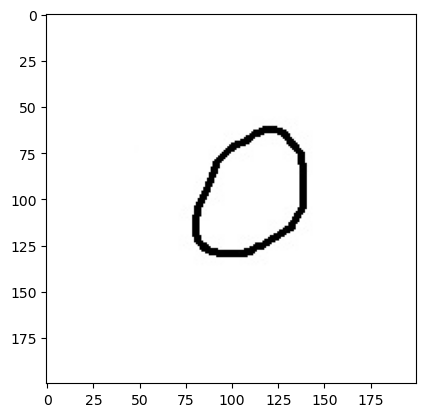

In [3]:
plt.imshow(img)

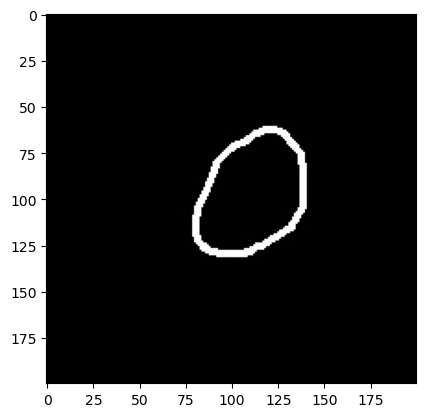

In [4]:
modif = np.zeros_like(img) # matrice de la même taille que mon image uniquement remplie de 0 
modif = 255 - img # inversion couleur  
plt.imshow(modif)
# 1er modification simple -> sauvegarde 

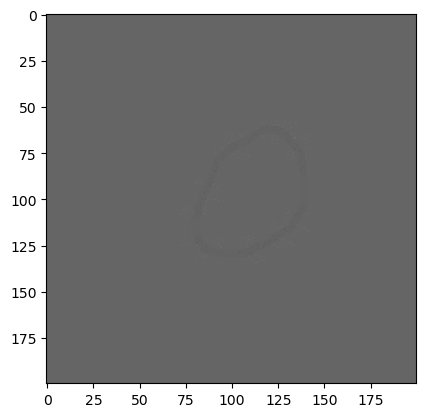

In [43]:
modif = np.zeros_like(img)
modif = abs(100 - img)
plt.imshow(modif)

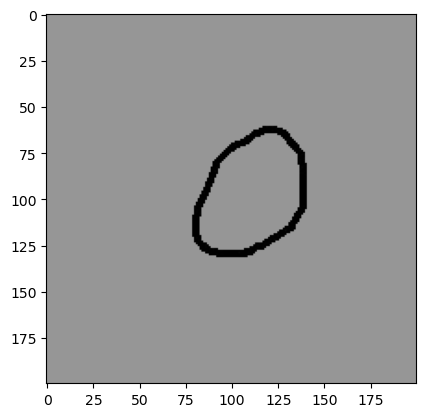

In [8]:
# ajustement de luminosité 
modif = np.clip(img.astype(int) , 0, 150).astype(np.uint8) 
# 0 => noir / blanc => 255 : grâce à np.clip on restreint les valeur entre 0 et 150 d'où le blanc qui devient gris
plt.imshow(modif)

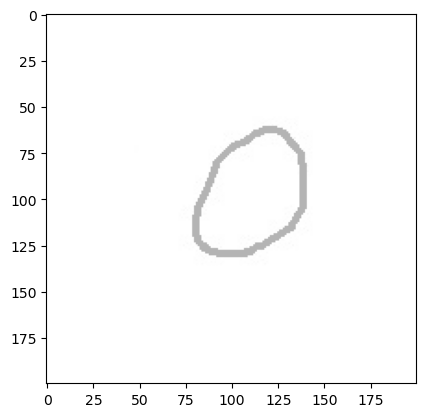

In [12]:
modif = np.clip(img.astype(int) , 180, 255).astype(np.uint8)
plt.imshow(modif)

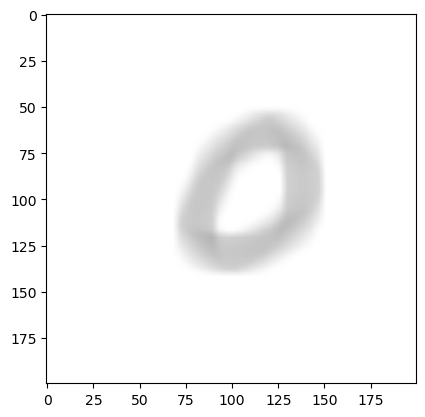

In [24]:
# Flou Gaussien => lisser une image 
ksize = (21, 21) # nb impair -> taille du noyau pour la convolution => plus les valeurs sont grandes plus le floutage dépendra d'un plus grand nombre de pixel
ecartType=15 #impact sur la prononciation du flou sur la matrice finale lors de la convolution 
img_floue = cv2.GaussianBlur(img, ksize, ecartType)
plt.imshow(img_floue)

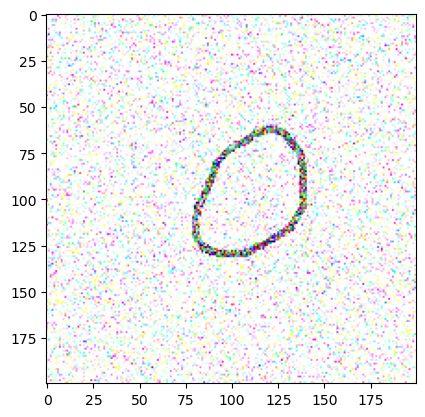

In [25]:
# Ajout du bruit sur l'image
mean = 0.5
std_dev = 0.5

# Convertir l'image en float et la normaliser entre 0 et 1
image = img.astype(np.float32) / 255.0

# Générer le bruit gaussien
noise = np.random.normal(mean, std_dev, image.shape)

# Ajouter le bruit à l'image
noisy_image = image + noise

# Clipper les valeurs pour s'assurer qu'elles restent dans la plage valide [0, 1]
noisy_image = np.clip(noisy_image, 0, 1)

# Convertir l'image en entiers 8 bits
noisy_image = (noisy_image * 255).astype(np.uint8)

# Afficher l'image avec bruit
plt.imshow(noisy_image)

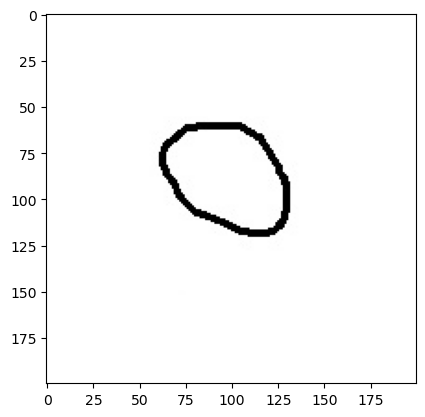

In [26]:
# Rotation de l'image
imgRota = np.rot90(img,45)
plt.imshow(imgRota)

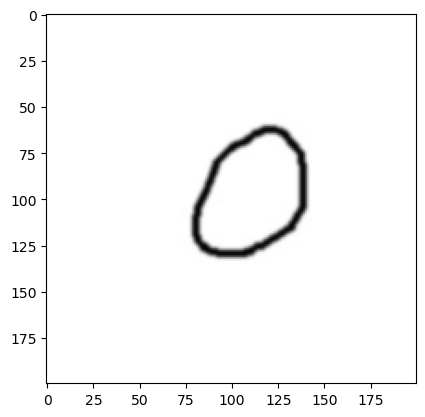

In [28]:
# Lisser image 
ksize = 5 # impaire et positif => taille noyau filtre gaussien
smoothed_image = cv2.GaussianBlur(img, (ksize,ksize), 1)
plt.imshow(smoothed_image)

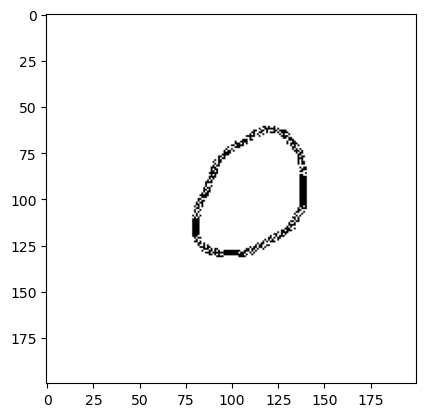

In [42]:
# Initialement : binarisation de l'image pour venir "émincer" la forme de notre 0
_,binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY) #retourne un tuple (valeur seuil réelement utilisé dans processus seuillage, l'image)
plt.imshow(binary_image)
# Cette opération nous cause des trous dans notre image => Solution  nous allons appliquer un filtre d'érosion

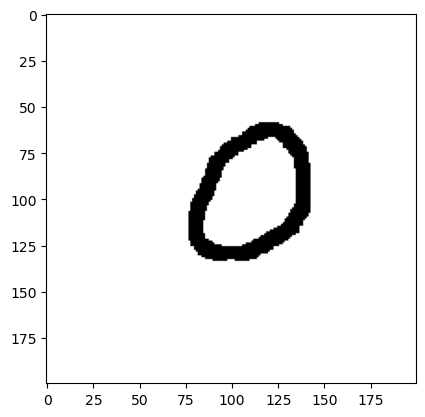

In [31]:
# Appliquer une érosion pour combler les trous
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
plt.imshow(eroded_image)
# Résultat final : cela viens rajouter des contours plutôt que de venir émincer 